# Masongo Umar

### 1. Data Exploration and Preprocessing:

In [118]:
import pandas as pd
import numpy as np

#Load the datasets
train_data = pd.read_csv ('dataset/train_data.csv')
test_data = pd.read_csv ('dataset/test_data.csv')

#### Exploring dataset: train_data

In [119]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


-: Dataset has 14 features and 7160 records. The columns are of different types object(7), int64(4) and float(3)

-: Some columns have spaces which should be replaced with underscore 

-: Colomns converted to lowercase

In [121]:
train_data.columns = train_data.columns.str.strip().str.replace(' ', '_').str.lower()
test_data.columns = test_data.columns.str.strip().str.replace(' ', '_').str.lower()
train_data.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [122]:
# Check for dupulicates
train_data.duplicated().any()

False

-: Datase has no duplicate records

In [123]:
# Check for missing values
train_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                 True
settlement            False
building_dimension     True
building_type         False
date_of_occupancy      True
numberofwindows       False
geo_code               True
claim                 False
dtype: bool

-: Dataset contains columns with null values (Garden, Building Dimension, Date_of_occupation, Geo_code)

In [124]:
# fill missing values with previous values
train_data.fillna(method ='pad', inplace=True)
test_data.fillna(method ='pad', inplace=True)
train_data.isnull().any()

customer_id           False
yearofobservation     False
insured_period        False
residential           False
building_painted      False
building_fenced       False
garden                False
settlement            False
building_dimension    False
building_type         False
date_of_occupancy     False
numberofwindows       False
geo_code              False
claim                 False
dtype: bool

#### Distribution of categorical values

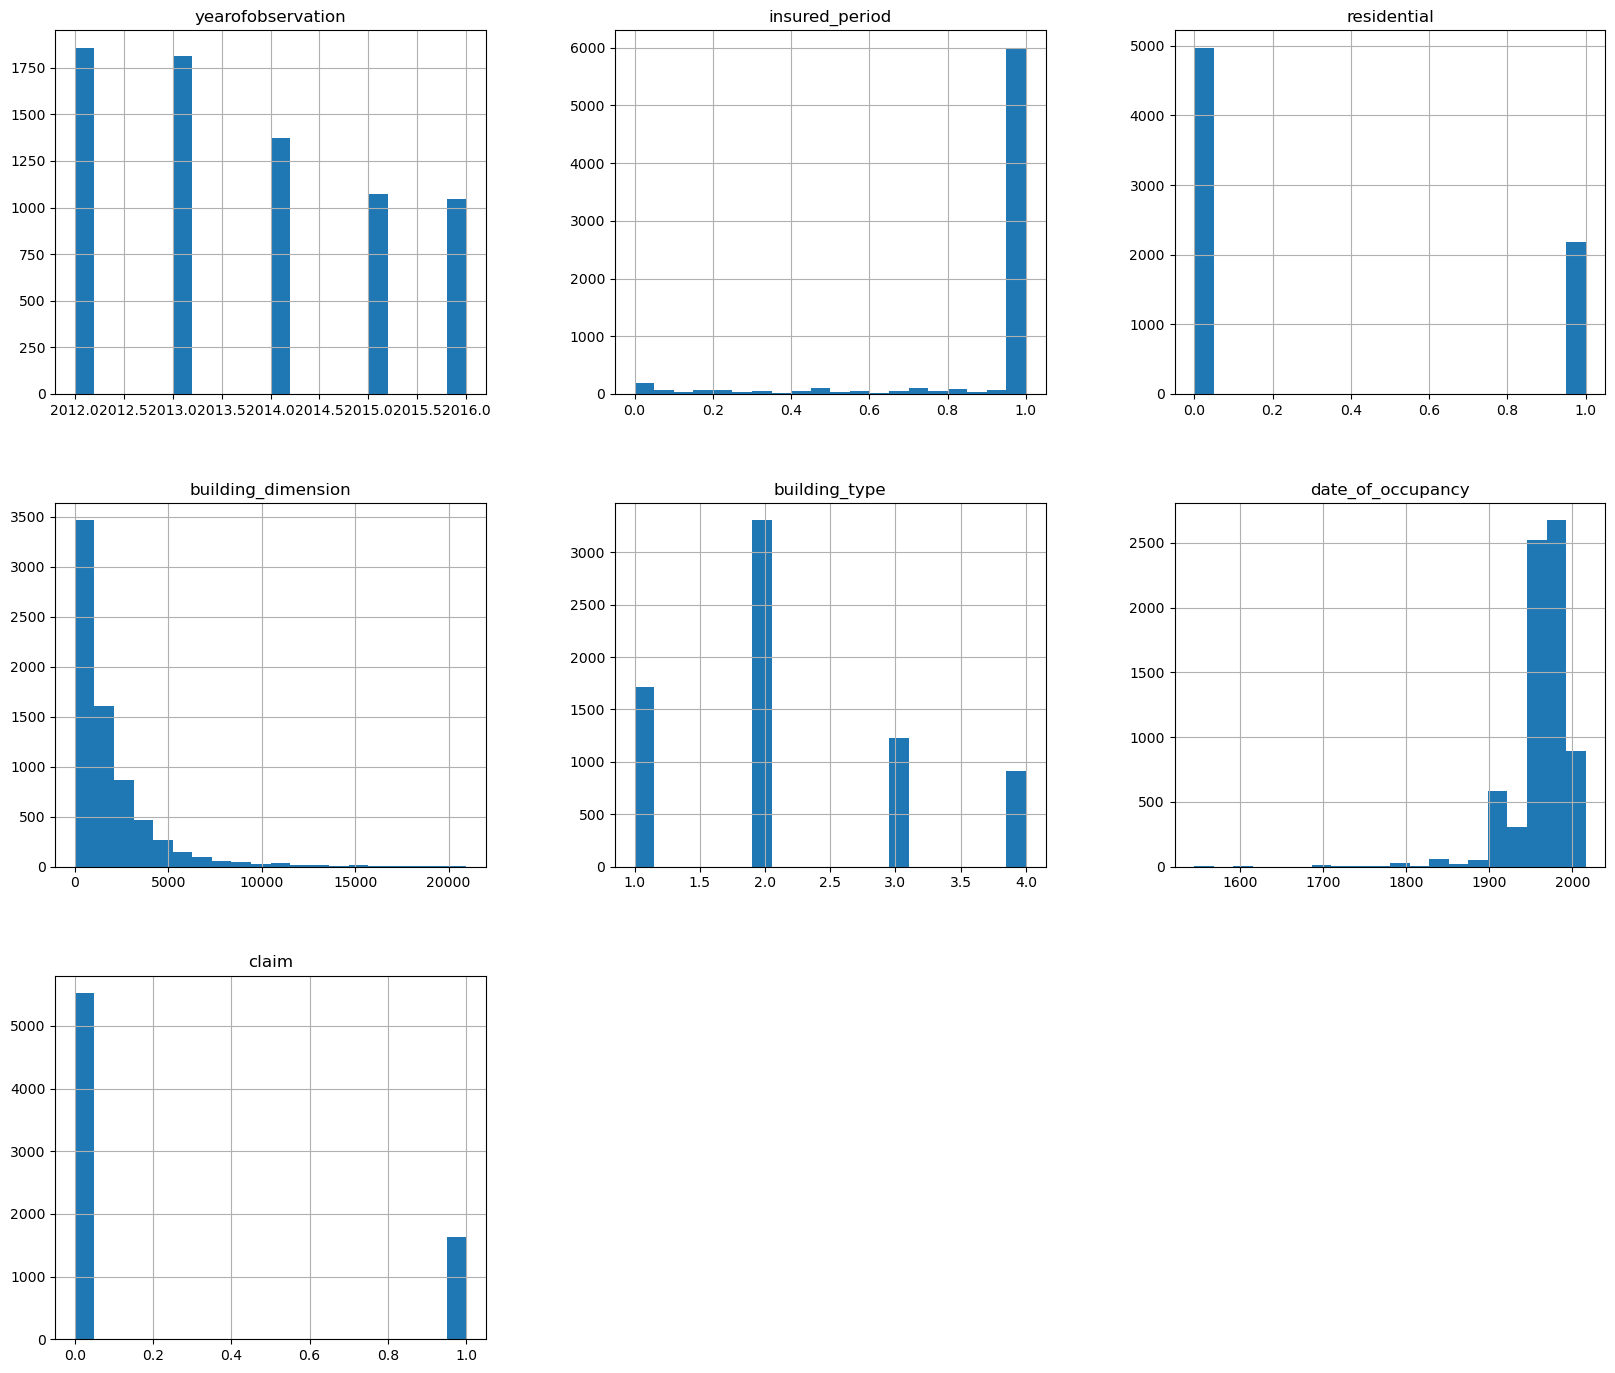

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.hist(bins=20, figsize=(20, 17))
plt.show()

### 2. Feature Selection:

In [126]:
# Removing columns customer_id, numberofwindows, geo_code due to the values they hold
train_customer_ids = train_data['customer_id']
test_customer_ids = test_data['customer_id']

columns = ['customer_id','numberofwindows','geo_code']
train_data.drop(columns=columns, axis=1, inplace=True)
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)


In [127]:
# Encoding the catedorical  variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
columns = ["building_painted", "building_fenced", "garden", "settlement"]
for column in columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.fit_transform(test_data[column])
    
train_data.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,claim
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,0
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,0


In [128]:
# Identifying the most relevant features for claim prediction
x = train_data.drop(columns=['claim'])
y = train_data['claim']

#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(x, y)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(x, y)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': x.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
7,building_dimension,1.678148e+06
8,building_type,1.276625e+02
1,insured_period,6.034230e+01
2,residential,4.904605e+01
5,garden,2.986619e+01
6,settlement,2.919064e+01
4,building_fenced,2.877967e+01
3,building_painted,7.971521e+00
9,date_of_occupancy,2.409386e+00
0,yearofobservation,1.919750e+00


### 3. Model Building:

In [129]:
#split train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)

In [135]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Gausian Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(name)
    print('-' * 60)
    print('Confusion Matrix')
    print(confusion_matrix(y_test, predictions))
    print('Classfication Report')
    print(classification_report(y_test, predictions))
    print('-' * 60)

SVM
------------------------------------------------------------
Confusion Matrix
[[1076   23]
 [ 299   34]]
Classfication Report
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1099
           1       0.60      0.10      0.17       333

    accuracy                           0.78      1432
   macro avg       0.69      0.54      0.52      1432
weighted avg       0.74      0.78      0.71      1432

------------------------------------------------------------
Logistic Regression
------------------------------------------------------------
Confusion Matrix
[[1073   26]
 [ 288   45]]
Classfication Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1099
           1       0.63      0.14      0.22       333

    accuracy                           0.78      1432
   macro avg       0.71      0.56      0.55      1432
weighted avg       0.75      0.78      0.72      1432

---------

In [131]:
#Linear regression
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)

#display regression coefficients and R-squared value of model
print(lnr.intercept_, lnr.coef_, lnr.score(X_test, y_test))

21.485535021043994 [-1.02973772e-02  1.56673095e-01  4.08931991e-03  9.23927860e-03
 -8.95830229e-03 -1.13733668e-01  1.25225337e-01  5.53266119e-05
  4.28189099e-02 -4.44528888e-04] 0.11080713308257006


### 4. Model Evaluation

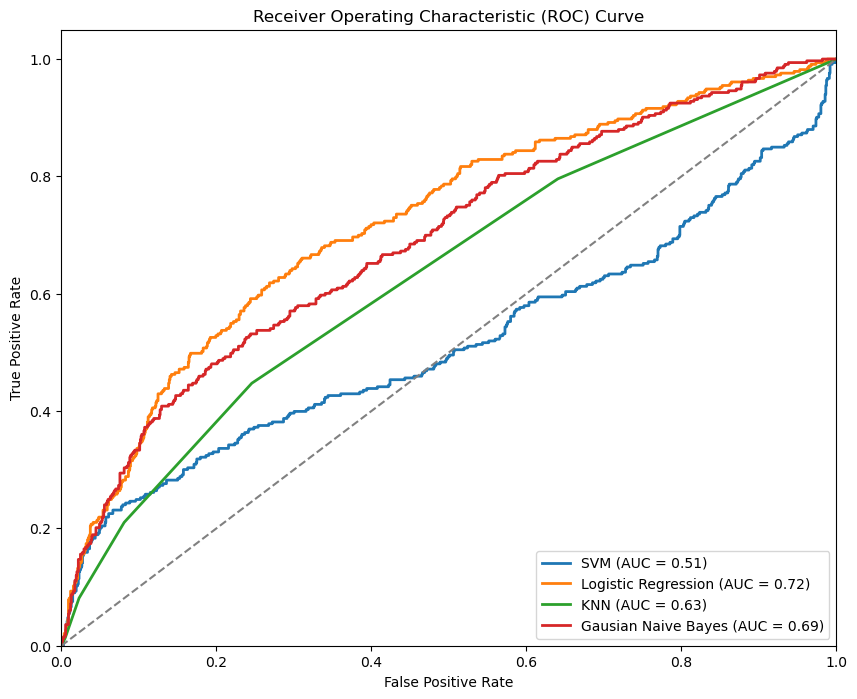

In [136]:
# ROC, AUC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# For each model, calculate ROC curve and AUC
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        probas_ = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

ax = plt.gca()  # get current axis
ax.set_facecolor('white')  # set background color to white
plt.grid(False)  # remove grid

plt.show()

### 4. Predictions on test data

In [137]:
#get prediction results for each model
for name, model in models.items():
    predictions = model.predict(test_data)
    prediction_df = pd.DataFrame({'customer_id': test_customer_ids, 'Predictions': predictions})
    
    # Save the predictions to a CSV file
    prediction_df.to_csv('output/'+name+'.csv', index=False)
    
    print(name)
    print('-' * 60)
    print(prediction_df)
    

SVM
------------------------------------------------------------
     customer_id  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]
Logistic Regression
------------------------------------------------------------
     customer_id  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]
KNN
------------------------------------------------------------
     customer_id  P